# **Introduction**

#### **1) Etude de l'offre médicale globale en France**

texte introductif qui présente le sujet


**Préliminaires**

In [2]:
# Installation des modules nécessaires à l'execution du code

!pip install openpyxl cartiflette mapclassify

In [3]:
# Import des Bibliothèques utilisés pour la lecture des Données et le tracé des graphiques

import openpyxl 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from cartiflette import carti_download
import mapclassify
import plotly.express as px

**Import des Bases de Données**

texte présentation base de données

In [4]:
# Import des Bases de données depuis "Bases de données/"

df_medecins_effectif_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=1)
df_medecins_age_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=2)
df_medecins_densite_complet = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=3)
df_medecins_secteur = pd.read_excel("Bases de données/demographie_medecins.xlsx", sheet_name=6)

**Définition de fonction pour tracer les graphes**

In [5]:
# Pour le camembert (ou "pie chart")

def plot_camembert(df, annee, ax, x, y):
    df_annuel = df[[x, y]]

    labels = df_annuel[x].unique()
    sizes = df_annuel[y].unique()

    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_title(f"{annee}")

**Premiers Graphes**

On explique qu'on va regarder un peu l'ensemble de l'offre avant de se concentrer 
sur les déserts médicaux

##### **1.1) Etude démographique de l'offre médicale globale en France**

In [6]:
# Définition de la base de données réduite 

# Traitement de la feuille des effectifs : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_effectif = df_medecins_effectif_complet[(df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    ]

df_medecins_effectif.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)
df_medecins_effectif.reset_index(drop = True, inplace = True)

df_medecins_effectif

df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') 
    & (df_medecins_effectif['tranche_age']=='00-Ensemble') 
    & (df_medecins_effectif['region'] == '00-Ensemble')
    & (df_medecins_effectif['departement'] == '000-Ensemble') 
    & (df_medecins_effectif['territoire'] == "0-France entière")] 
df = df_cond.copy()

/tmp/ipykernel_73707/3275316376.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_effectif.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)


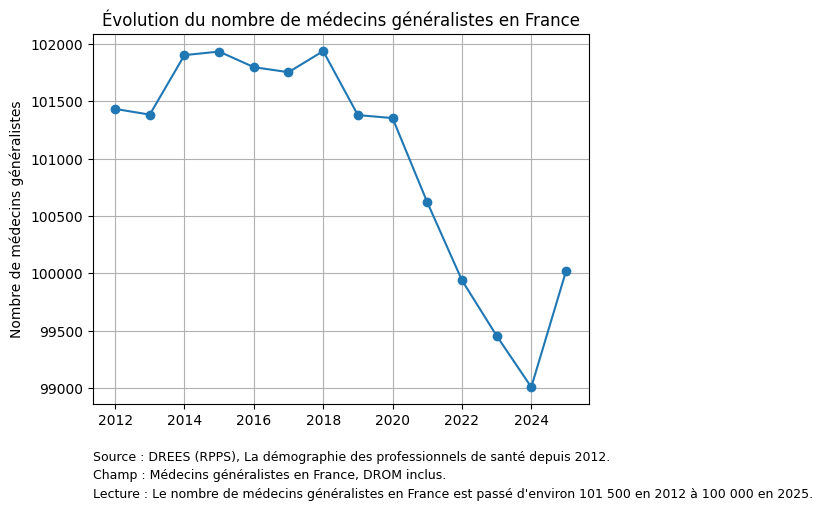

In [7]:
# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 

# Définition des ordonnées : effectifs des années 2012 à 2025 
effectifs = df[[f"effectif_{a}" for a in annees]].values.flatten() 
plt.plot(annees, effectifs, marker = "o") 

# Affichage du graphique 
plt.ylabel("Nombre de médecins généralistes") 
plt.title("Évolution du nombre de médecins généralistes en France") 

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : Le nombre de médecins généralistes en France est passé d'environ 101 500 en 2012 à 100 000 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

In [8]:
# Traitement de la feuille des effectifs : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_tranche_comp = df_medecins_effectif_complet[(df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] != "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    ]

df_medecins_tranches = df_medecins_tranche_comp.drop(axis = 1, columns = ['region','sexe', 'specialites', 'specialites_agregees','territoire','departement','exercice'])
df_medecins_tranche_comp.reset_index(drop = True, inplace = True)

df_medecins_tranche_comp.head()

,territoire,region,departement,specialites_agregees,specialites,exercice,tranche_age,sexe,effectif_2012,effectif_2013,...,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,0-France entière,00-Ensemble,000-Ensemble,1-Médecine générale,00-Ensemble,0-Ensemble,01-moins de 30 ans,0-Ensemble,1175,1427,...,2133,2249,2454,2422,2442,2210,2056,1992,2024,2167
1,0-France entière,00-Ensemble,000-Ensemble,1-Médecine générale,00-Ensemble,0-Ensemble,02-entre 30 et 34 ans,0-Ensemble,6392,6391,...,8983,10102,11294,12138,12993,13240,13536,13434,12878,12671
2,0-France entière,00-Ensemble,000-Ensemble,1-Médecine générale,00-Ensemble,0-Ensemble,03-entre 35 et 39 ans,0-Ensemble,8362,8277,...,8020,8019,8299,8878,9785,10960,12223,13280,14368,15490
3,0-France entière,00-Ensemble,000-Ensemble,1-Médecine générale,00-Ensemble,0-Ensemble,04-entre 40 et 44 ans,0-Ensemble,9946,9701,...,8911,8548,8547,8475,8284,8175,8225,8444,8947,10062
4,0-France entière,00-Ensemble,000-Ensemble,1-Médecine générale,00-Ensemble,0-Ensemble,05-entre 45 et 49 ans,0-Ensemble,13961,12751,...,10303,9976,9741,9502,9151,8841,8422,8372,8302,8256


In [9]:
def nouvelle_tranche(tranche):
    if tranche in ["01-moins de 30 ans", "02-entre 30 et 34 ans"]:
        return "Moins de 35 ans"
    elif tranche in ["03-entre 35 et 39 ans", "04-entre 40 et 44 ans"]:
        return "35–44 ans"
    elif tranche in ["05-entre 45 et 49 ans", "06-entre 50 et 54 ans"]:
        return "45–54 ans"
    elif tranche in ["07-entre 55 et 59 ans", "08-entre 60 et 64 ans"]:
        return "55–64 ans"
    else:
        return "65 ans et +"

df_medecins_tranches["nouvelle_tranche_age"] = df_medecins_tranches["tranche_age"].apply(nouvelle_tranche)
cols_effectifs = [c for c in df_medecins_tranches.columns if c.startswith("effectif_")]

df_medecins_nouvelles_tranches = df_medecins_tranches.groupby("nouvelle_tranche_age")[cols_effectifs].sum().reset_index()
df_medecins_nouvelles_tranches.head()



,nouvelle_tranche_age,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,35–44 ans,18308,17978,17703,17294,16931,16567,16846,17353,18069,19135,20448,21724,23315,25552
1,45–54 ans,33762,31945,30103,27654,25457,23731,22287,20956,19686,18910,18138,17845,17475,17161
2,55–64 ans,36244,36631,36764,36979,37022,36614,35674,34489,33300,31672,29997,28189,26276,24341
3,65 ans et +,5554,7013,8759,10086,11273,12492,13384,14023,14865,15454,15766,16273,17041,18127
4,Moins de 35 ans,7567,7818,8575,9922,11116,12351,13748,14560,15435,15450,15592,15426,14902,14838


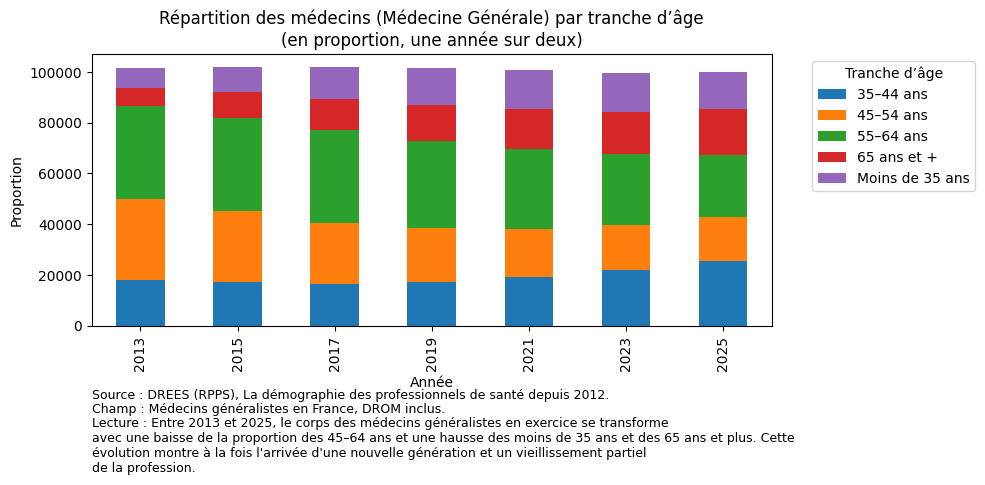

In [36]:
df_medecins_nouvelles_tranches.columns = ["Nouvelle_tranche_age"] + [f"{a}" for a in range(2012, 2026)]

# Sélection des années (1/2 entre 2013 et 2025)
annees = list(range(2013, 2026, 2))
cols = [f"{a}" for a in annees]

# Mise en forme pour les nouvelles tranches
df_plot = df_medecins_nouvelles_tranches.set_index("Nouvelle_tranche_age")[cols].T

# Histogramme en barres empilées
df_plot.plot(kind="bar",stacked=True,figsize=(10, 6))

# Légende & Titre
plt.ylabel("Proportion")
plt.xlabel("Année")
plt.title("Répartition des médecins (Médecine Générale) par tranche d’âge\n(en proportion, une année sur deux)")
plt.legend(title="Tranche d’âge", bbox_to_anchor=(1.05, 1))

# Sous-texte
plt.text(0, -0.28, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.33, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.55, "Lecture : Entre 2013 et 2025, le corps des médecins généralistes en exercice se transforme\n"
    "avec une baisse de la proportion des 45–64 ans et une hausse des moins de 35 ans et des 65 ans et plus. Cette \n"
    "évolution montre à la fois l'arrivée d'une nouvelle génération et un vieillissement partiel \n"
    "de la profession.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.tight_layout()
plt.show()


##### **1.2) Etude Géographique de l'offre médicale globale en France**

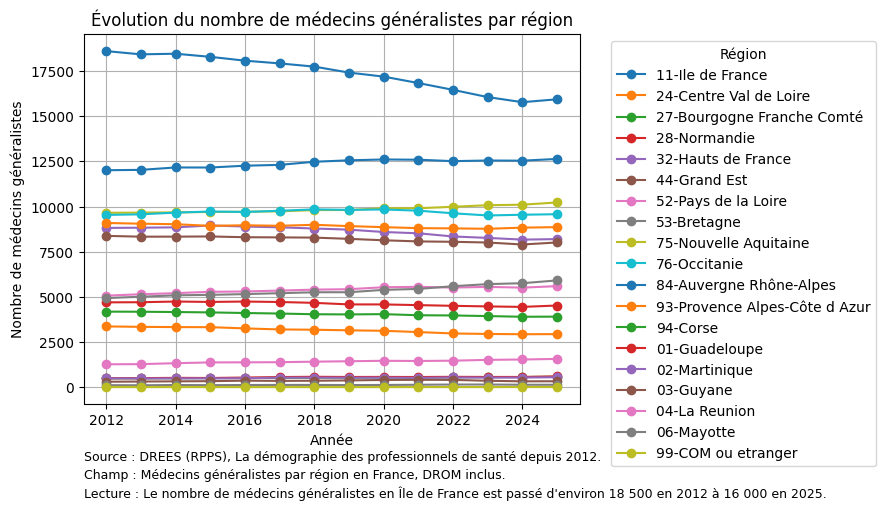

In [11]:
# Définition de la base de données réduite 
df_cond = df_medecins_effectif[(df_medecins_effectif['exercice']=='0-Ensemble') & (df_medecins_effectif['tranche_age']=='00-Ensemble') & (df_medecins_effectif['region'] != '00-Ensemble')]
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026))

# Définition des ordonnées : effectifs par région des années 2012 à 2025 
for region in df['region'].unique() :
    df_region = df[(df['region'] == region) & (df['departement'] == '000-Ensemble')]
    effectifs = df_region[[f"effectif_{a}" for a in annees]].values.flatten()
    plt.plot(annees, effectifs, label = region, marker = "o")

# Affichage du graphique 
plt.xlabel("Année")
plt.ylabel("Nombre de médecins généralistes")
plt.title(f"Évolution du nombre de médecins généralistes par région")

# Légende
plt.legend(title="Région", bbox_to_anchor=(1.05, 1), loc="upper left")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes par région en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : Le nombre de médecins généralistes en Île de France est passé d'environ 18 500 en 2012 à 16 000 en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

In [12]:
# Traitement de la feuille des âges moyens : on ne conserve que les médecins généralistes et on enlève les variables pas pertinentes ou redondantes
df_medecins_age = df_medecins_age_complet[(df_medecins_age_complet['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_age_complet['sexe'] == '0-Ensemble')
    & (df_medecins_age_complet['specialites'] == '00-Ensemble')]

df_medecins_age.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)
df_medecins_age.reset_index(drop = True, inplace = True)

df_medecins_age.head()

/tmp/ipykernel_73707/4028593933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_age.drop(axis = 1, columns = ['sexe', 'specialites', 'specialites_agregees'], inplace = True)


,territoire,region,departement,exercice,am_2012,am_2013,am_2014,am_2015,am_2016,am_2017,am_2018,am_2019,am_2020,am_2021,am_2022,am_2023,am_2024,am_2025
0,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,51.1,51.4,51.6,51.7,51.7,51.7,51.4,51.3,51.1,51.1,50.8,50.7,50.6,50.4
1,0-France entière,00-Ensemble,000-Ensemble,1-Libéral,51.9,52.2,52.4,52.4,52.4,52.3,52.1,51.8,51.5,51.3,50.9,50.5,50.4,50.1
2,0-France entière,00-Ensemble,000-Ensemble,2-Mixte,52,51.9,51.8,51.3,50.9,50.7,50.4,49.8,49.5,49,48.5,48,47.5,46.9
3,0-France entière,00-Ensemble,000-Ensemble,3-Salarié hospitalier,46.2,46.4,46.6,46.8,46.8,46.8,46.7,46.8,46.8,47.1,47.5,48,48.4,48.5
4,0-France entière,00-Ensemble,000-Ensemble,4-Autre Salarié,52.4,53.1,53.7,54.1,54.4,54.7,54.8,55,55.1,55.2,55.3,55.3,55.3,55.3


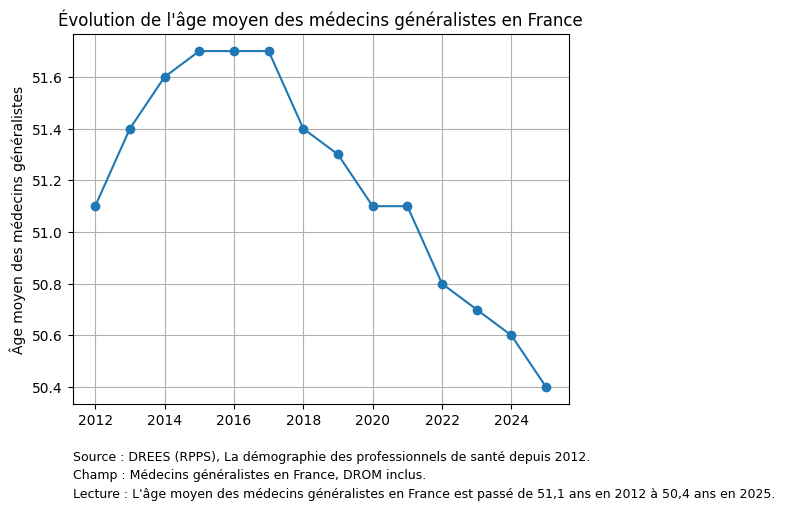

In [13]:
# Définition de la base de données réduite 
df_cond = df_medecins_age[(df_medecins_age['exercice']=='0-Ensemble') 
    & (df_medecins_age['region'] == '00-Ensemble') 
    & (df_medecins_age['territoire'] == "0-France entière")] 
df = df_cond.copy()

# Définition des abscisses : années 2012 à 2025 
annees = list(range(2012,2026)) 


# Définition des ordonnées : effectifs des années 2012 à 2025 
effectifs = df[[f"am_{a}" for a in annees]].values.flatten() 
plt.plot(annees, effectifs, marker = "o") 

# Affichage du graphique plt.xlabel("Année") 
plt.ylabel("Âge moyen des médecins généralistes") 
plt.title("Évolution de l'âge moyen des médecins généralistes en France") 
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins généralistes en France, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : L'âge moyen des médecins généralistes en France est passé de 51,1 ans en 2012 à 50,4 ans en 2025.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True)
plt.show()

##### **1.3) Etude des spécialisations & sectorisation de l'offre médicale globale en France**

**1.3.1) Etude de la sectorisation des médecins en France**

In [14]:
df_medecins_secteur_réduit= df_medecins_secteur[(df_medecins_secteur['specialites_agregees'] == '1-Médecine générale') 
    & (df_medecins_secteur['region'] == '00-Ensemble')
    & (df_medecins_secteur['departement'] == '000-Ensemble')
    & (df_medecins_secteur['mode_exercice'] == '0-Ensemble')
    & (df_medecins_secteur['territoire'] == '0-France entière')
    & (df_medecins_secteur['specialites'] == '01-Médecine générale')
    ]
df_medecins_secteur_réduit.head()

,territoire,region,departement,mode_exercice,secteur_activite,specialites,specialites_agregees,activités_2012,activités_2013,activités_2014,...,activités_2016,activités_2017,activités_2018,activités_2019,activités_2020,activités_2021,activités_2022,activités_2023,activités_2024,activités_2025
3,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,00-Ensemble,01-Médecine générale,1-Médecine générale,112701,115011,117635,...,121306,122650,124046,124527,125628,126096,126233,126541,129841,131133
21,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,01-Hôpital public,01-Médecine générale,1-Médecine générale,17618,18373,19202,...,19993,20680,21043,21276,21357,21257,21111,20684,20961,21118
39,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,02-Etablissement privé ESPIC,01-Médecine générale,1-Médecine générale,1597,1671,1682,...,1771,1804,1857,1897,1864,1913,1989,1946,2047,2070
57,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,03-Etablissement privé lucratif,01-Médecine générale,1-Médecine générale,1312,1579,1652,...,1918,2000,2098,2187,2251,2279,2290,2335,2402,2434
75,0-France entière,00-Ensemble,000-Ensemble,0-Ensemble,"04-Centre de santé, maison de santé",01-Médecine générale,1-Médecine générale,2792,3228,3480,...,3794,3911,3971,4080,4514,4885,5124,5583,6516,7235


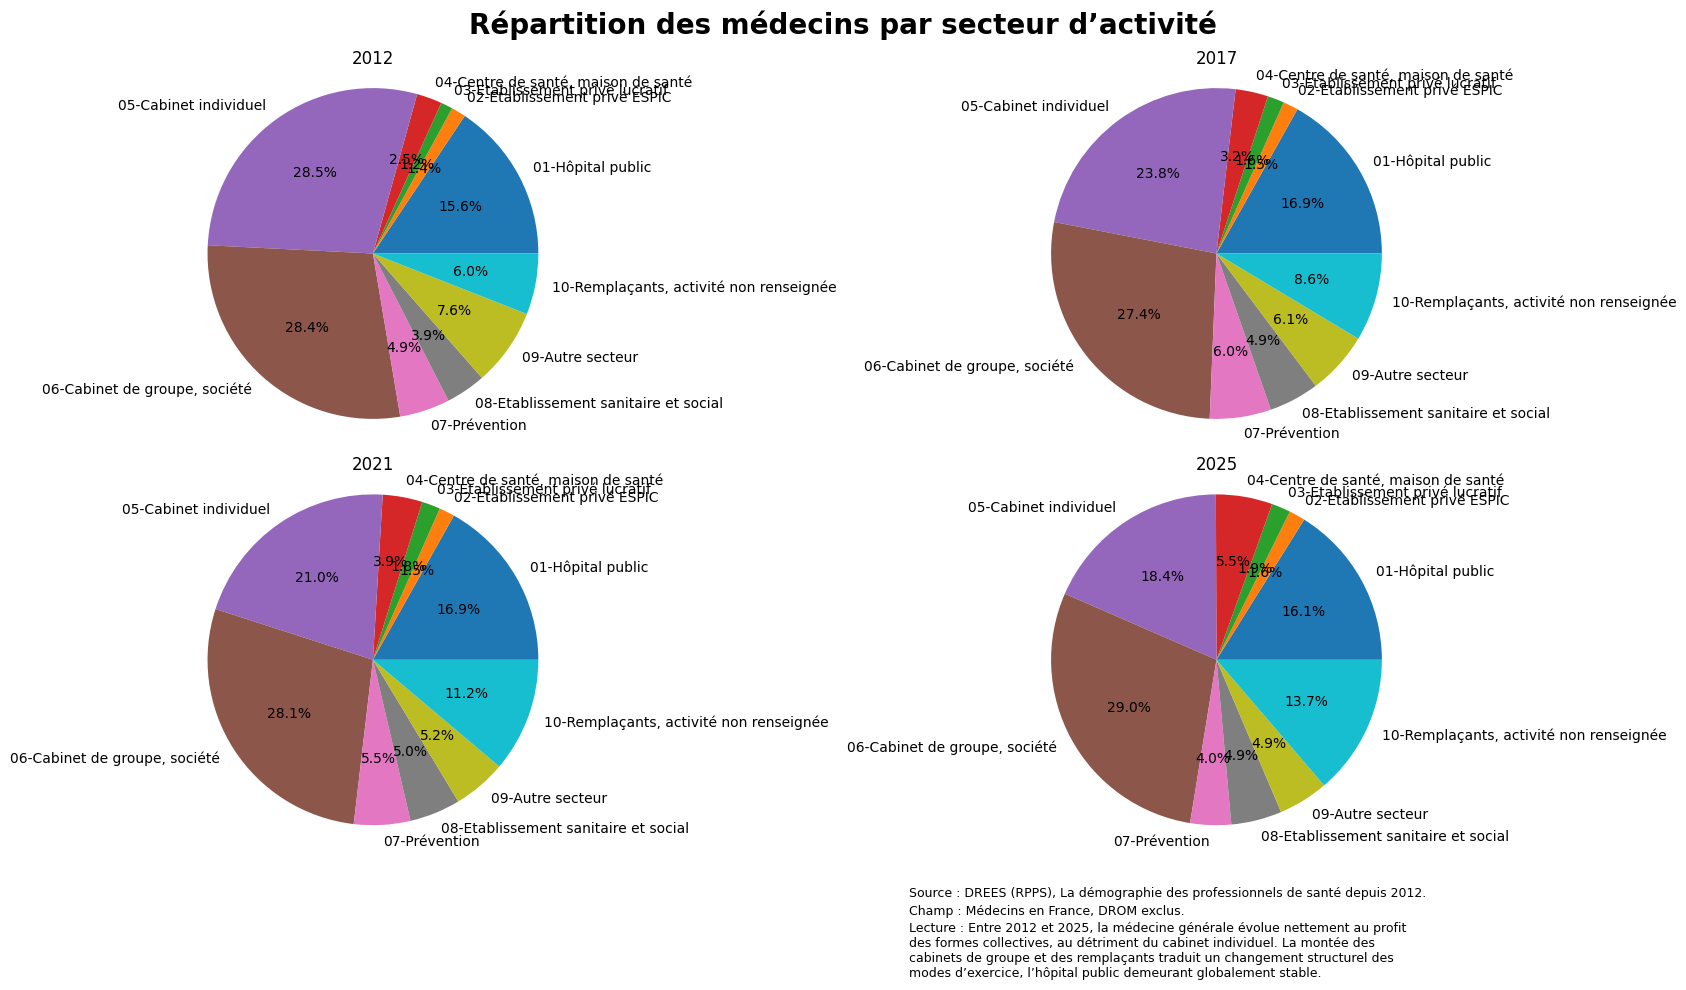

In [15]:
df_medecins_secteur_réduit = df_medecins_secteur_réduit[df_medecins_secteur_réduit["secteur_activite"] != "00-Ensemble"]

# Définition de la figure (répartition & taille)
fig, axes = plt.subplots(2, 2, figsize=(17, 10))

# Tracé des graphes
for axe, annee in zip(axes.flatten(), [2012, 2017, 2021, 2025]):
    plot_camembert(df_medecins_secteur_réduit, annee, axe, 'secteur_activite',f'activités_{annee}')

# Titre
fig.suptitle("Répartition des médecins par secteur d’activité", fontsize=20, fontweight="bold")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins en France, DROM exclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.38,
    "Lecture : Entre 2012 et 2025, la médecine générale évolue nettement au profit\n"
    "des formes collectives, au détriment du cabinet individuel. La montée des\n"
    "cabinets de groupe et des remplaçants traduit un changement structurel des\n"
    "modes d’exercice, l’hôpital public demeurant globalement stable.",
    va="bottom",
    fontsize=9,
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.show()

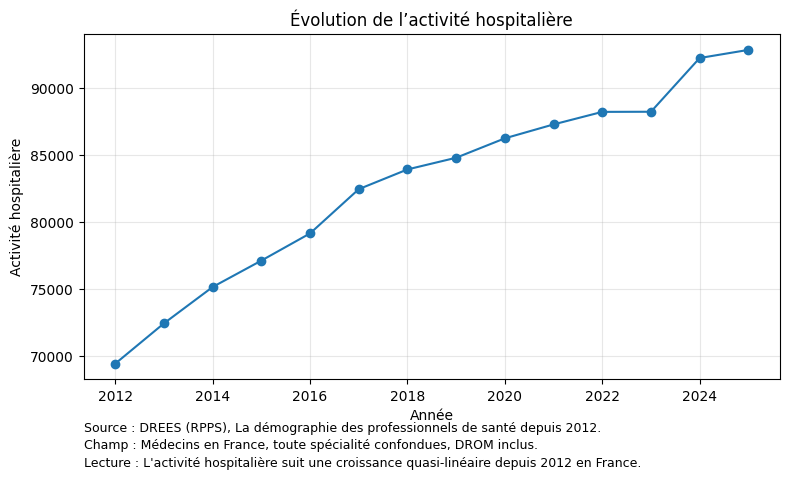

In [26]:
df_hopital = df_medecins_secteur[(df_medecins_secteur["secteur_activite"] == "01-Hôpital public")
    & (df_medecins_secteur["mode_exercice"] == "0-Ensemble")
    & (df_medecins_secteur["departement"] == "000-Ensemble")
    & (df_medecins_secteur["region"] == "00-Ensemble")
    & (df_medecins_secteur["territoire"] == "0-France entière")
    & (df_medecins_secteur["specialites_agregees"] == "00-Ensemble")
    & (df_medecins_secteur["specialites"] == "00-Ensemble")
    ]

# Colonnes d'activité
cols_activite = [c for c in df_hopital.columns if c.startswith("activités_")]

# Années
annees = [int(c.split("_")[1]) for c in cols_activite]


plt.figure(figsize=(8, 5))
plt.plot(annees, df_hopital[cols_activite].iloc[0], marker='o')


plt.xlabel("Année")
plt.ylabel("Activité hospitalière")
plt.title("Évolution de l’activité hospitalière")
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins en France, toute spécialité confondues, DROM inclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.26, "Lecture : L'activité hospitalière suit une croissance quasi-linéaire depuis 2012 en France.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**1.3.1) Etude de la spécialisation des médecins en France**

In [ ]:
df_medecins_specialité = df_medecins_effectif_complet[(df_medecins_effectif_complet['sexe'] == '0-Ensemble')
    & (df_medecins_effectif_complet['departement'] == '000-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] == "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] != '00-Ensemble')
    ]

df_medecins_specialité.drop(axis = 1, columns = ['region','specialites_agregees','sexe', 'tranche_age','territoire','departement','exercice'], inplace = True)
df_medecins_specialité.reset_index(drop = True, inplace = True)
df_medecins_specialité.head()

/tmp/ipykernel_63879/3033301306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_specialité.drop(axis = 1, columns = ['region','specialites_agregees','sexe', 'tranche_age','territoire','departement','exercice'], inplace = True)


,specialites,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,01-Médecine générale,101435,101385,101904,101935,101799,101755,101939,101381,101355,100621,99941,99457,99009,100019
1,02-Chirurgie,11984,12225,12448,12665,12887,13106,13314,13405,13644,13788,13956,13952,14139,14332
2,03-Ophtalmologie,5760,5817,5820,5865,5881,5900,5853,5821,5850,5826,5794,5749,5825,5981
3,04-Oto-rhino-laryngologie,3018,3043,3059,3042,3061,3048,3022,3006,3023,2999,2996,2963,2937,2933
4,05-Anesthésie-Réanimation,10846,11008,11145,11368,11512,11666,11846,11856,12063,12215,12523,12763,13273,13536


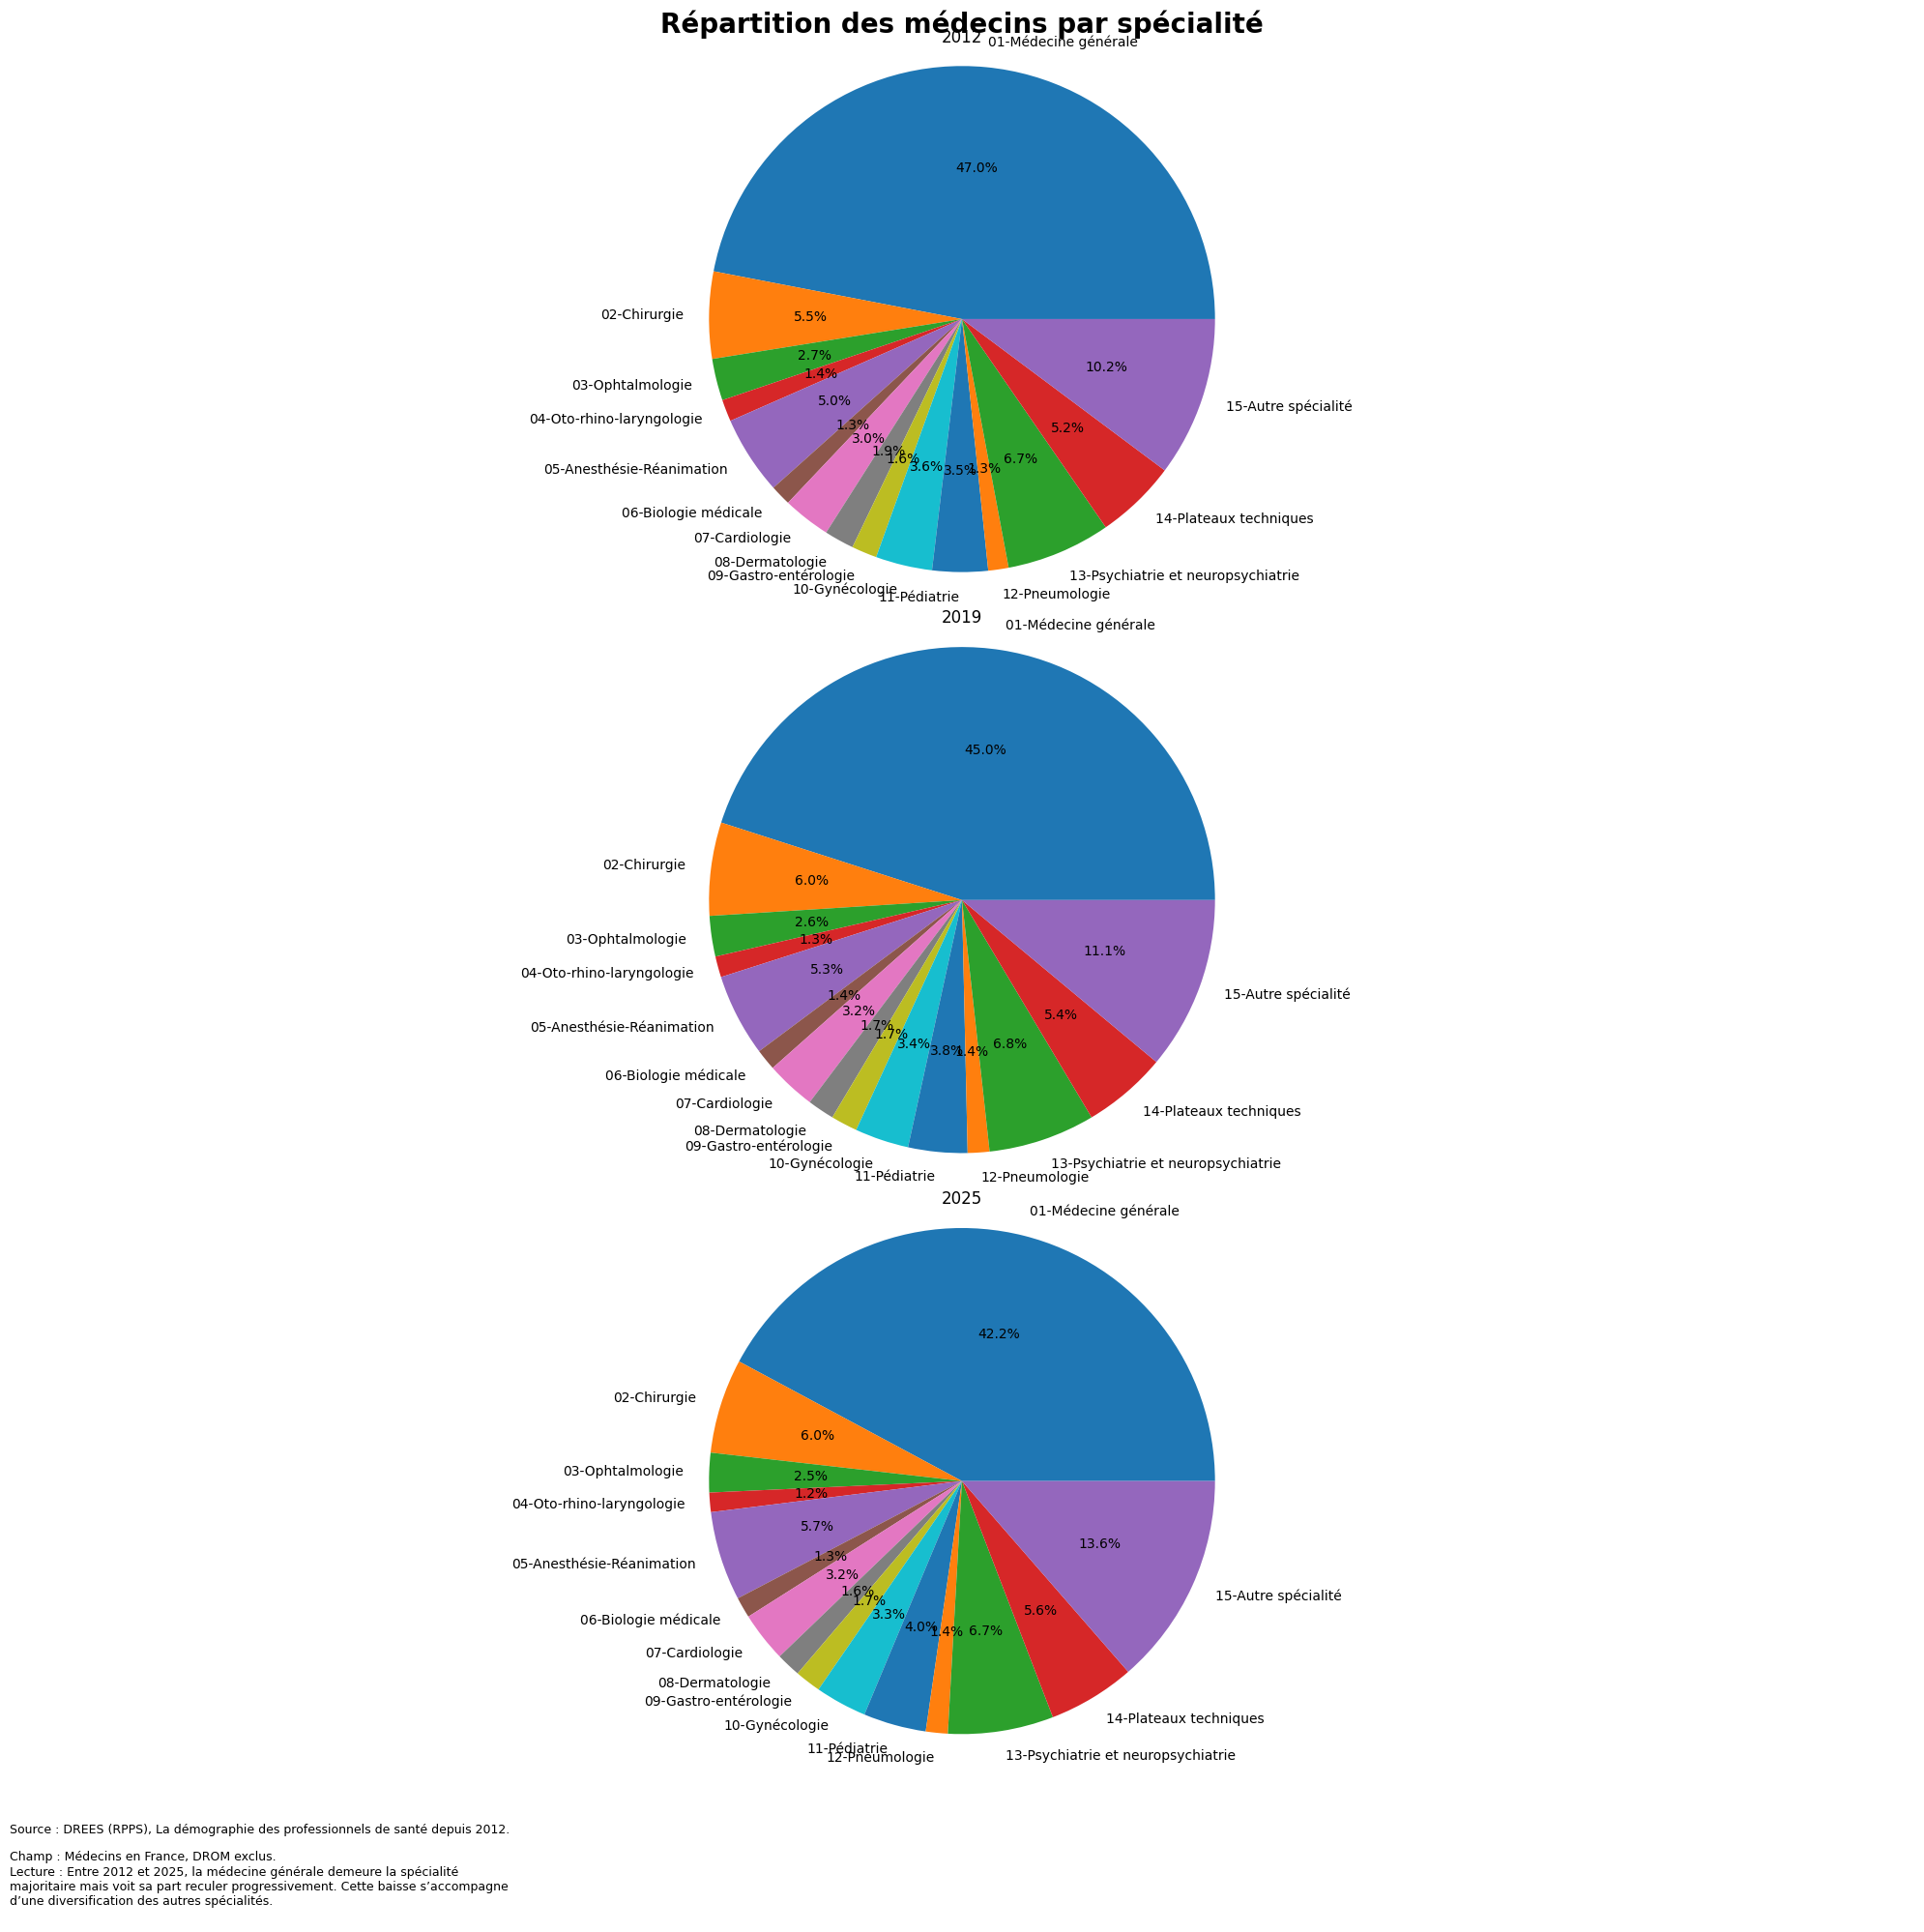

In [ ]:
# Définition de la figure (répartition & taille)
fig, axes = plt.subplots(3, 1, figsize=(20, 20))

# Tracé des graphes
for axe, annee in zip(axes, [2012, 2019, 2025]):
    plot_camembert(df_medecins_specialité, annee, axe, 'specialites', f'effectif_{annee}')

# Titre
fig.suptitle("Répartition des médecins par spécialité", fontsize=20, fontweight="bold")

# Sous-texte
plt.text(0, -0.16, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.21, "Champ : Médecins en France, DROM exclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.32,
    "Lecture : Entre 2012 et 2025, la médecine générale demeure la spécialité \n"
    "majoritaire mais voit sa part reculer progressivement. Cette baisse s’accompagne \n"
    "d’une diversification des autres spécialités.\n",
    va="bottom",
    fontsize=9,
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.show()

In [ ]:
df_medecins_parité = df_medecins_effectif_complet[(df_medecins_effectif_complet['sexe'] != '0-Ensemble')
    & (df_medecins_effectif_complet['departement'] == '000-Ensemble')
    & (df_medecins_effectif_complet['exercice']=='0-Ensemble') 
    & (df_medecins_effectif_complet['region'] == '00-Ensemble') 
    & (df_medecins_effectif_complet['territoire'] == "0-France entière")
    & (df_medecins_effectif_complet['tranche_age'] == "00-Ensemble")
    & (df_medecins_effectif_complet['specialites'] == '00-Ensemble')
    & (df_medecins_effectif_complet['specialites_agregees'] == '1-Médecine générale')
    ]

df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)
df_medecins_parité.reset_index(drop = True, inplace = True)
df_medecins_parité.head()

/tmp/ipykernel_63879/3698996331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medecins_parité.drop(axis = 1, columns = ['region','specialites_agregees','specialites', 'tranche_age','territoire','departement','exercice'], inplace = True)


,sexe,effectif_2012,effectif_2013,effectif_2014,effectif_2015,effectif_2016,effectif_2017,effectif_2018,effectif_2019,effectif_2020,effectif_2021,effectif_2022,effectif_2023,effectif_2024,effectif_2025
0,1-Hommes,60035,59183,58644,57634,56579,55556,54550,53146,52255,50936,49754,48754,47822,47567
1,2-Femmes,41400,42202,43260,44301,45220,46199,47389,48235,49100,49685,50187,50703,51187,52452


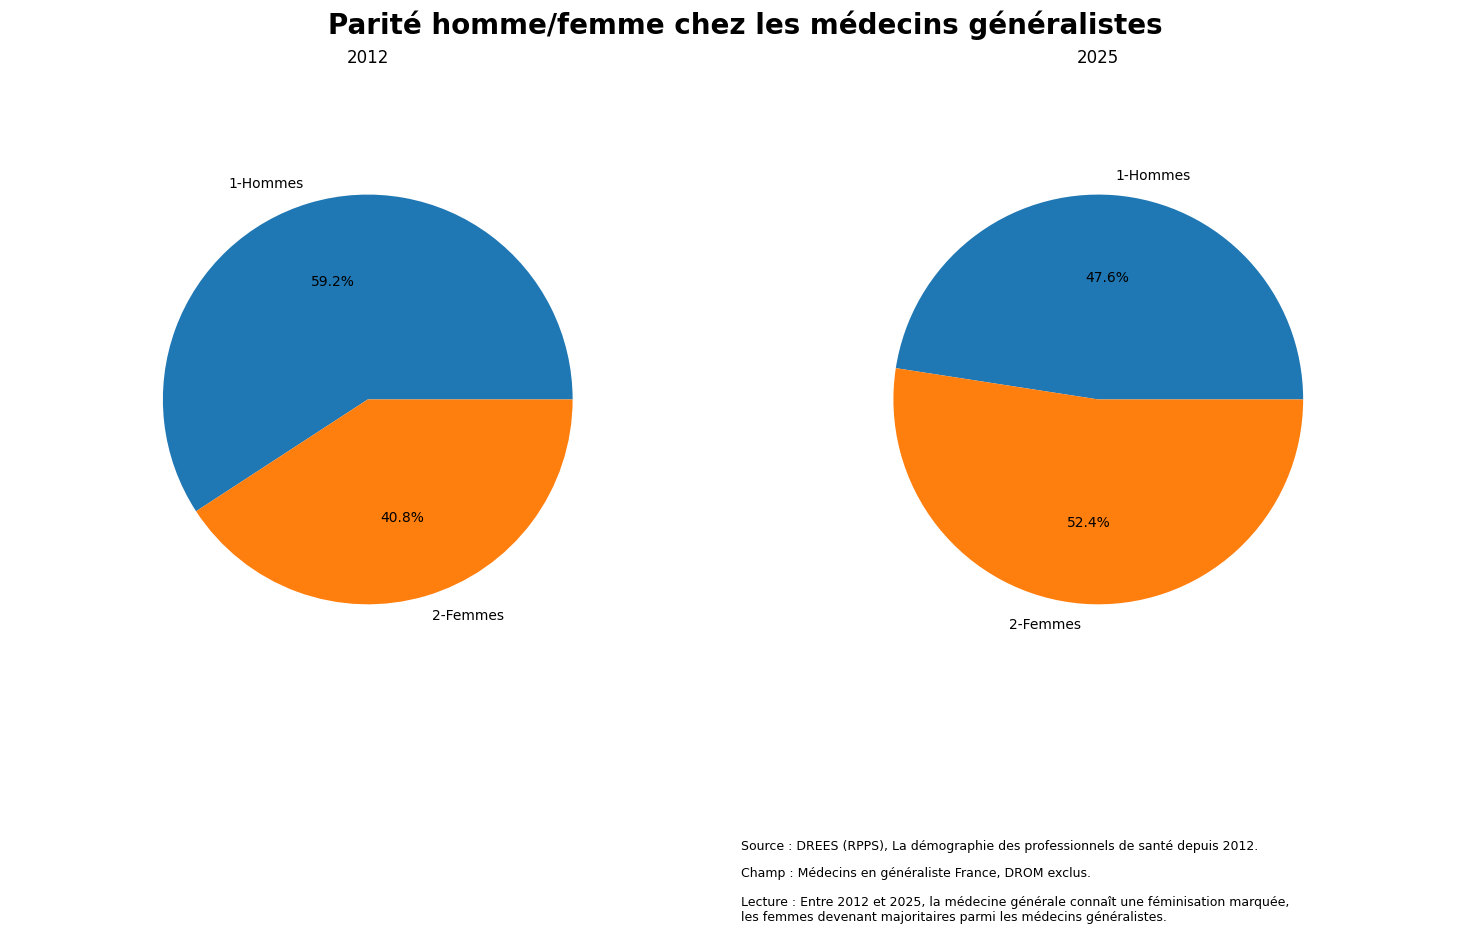

In [ ]:
# Définition de la figure (répartition & taille)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Tracé des graphes
for axe, annee in zip(axes, [2012, 2025]):
    plot_camembert(df_medecins_parité, annee, axe, 'sexe', f'effectif_{annee}')

# Titre
fig.suptitle("Parité homme/femme chez les médecins généralistes", fontsize=20, fontweight="bold")

# Sous-texte
plt.text(0, -0.19, "Source : DREES (RPPS), La démographie des professionnels de santé depuis 2012.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.23, "Champ : Médecins en généraliste France, DROM exclus.", ha="left", va="bottom", fontsize=9, transform=plt.gca().transAxes) 
plt.text(0, -0.32,
    "Lecture : Entre 2012 et 2025, la médecine générale connaît une féminisation marquée, \n"
    "les femmes devenant majoritaires parmi les médecins généralistes. \n",
    va="bottom",
    fontsize=9,
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.show()

#### **2) Etude de la présence de déserts médicaux**